In [5]:
import numpy as np
import dlsfunctions as dls
import initialization_data as init
import matplotlib.pyplot as plt

In [10]:
# generates unequal-amplitude bimodal distribution
def generate_bimodal_distribution(d, mean1, sigma1, mean2, sigma2, mie_fract):
    f1 = 1/(sigma1*np.sqrt(2*np.pi**2))*np.exp(-(d-mean1)**2/(2*sigma1**2))
    f1 = f1* dls.normalize(f1, 1, d[1] - d[0])
    
    f2 = 1/(sigma2*np.sqrt(2*np.pi**2))*np.exp(-(d-mean2)**2/(2*sigma2**2))
    f2 = f2 * dls.normalize(f2, 1, d[1] - d[0])
    
    f = f1 + 2*f2
    f = f * dls.normalize(f, 1, d[1] - d[0])
    return f

In [15]:
d = init.get_distance()

mean1 = init.get_left_mean()
sigma1 = init.get_narrow_sigma()

mean2 = init.get_right_mean()
sigma2 = init.get_narrow_sigma()

c = init.c
m = init.m
beta = init.beta

f = generate_bimodal_distribution(d, mean1, sigma1, mean2, sigma2, c)

time = init.get_log_time()
gamma = init.get_gamma()

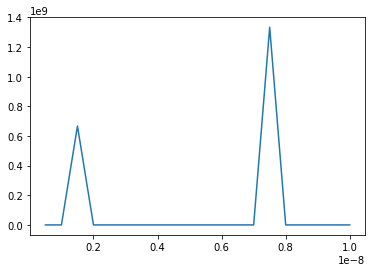

In [12]:
plt.plot(d,f)

In [14]:
dls.check_distribution_norm(f, d[1] - d[0])

1.0

In [16]:
theta_input = np.append(f, beta)
sim_data = dls.g2(theta_input, d, m, gamma, time)

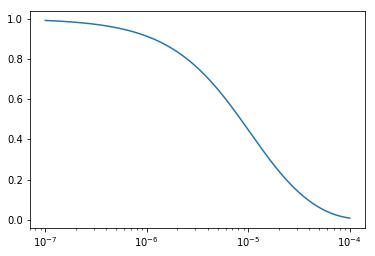

In [17]:
plt.semilogx(time, sim_data)

In [18]:
ndim = 21
nwalkers = 100
nsteps = 1000

In [19]:
start_pos = dls.create_start_pos(theta_input, ndim, nwalkers)
sampler = dls.create_sampler(nwalkers, ndim, d, sim_data, m, gamma, time)
result = dls.infer(sampler, start_pos, nsteps)
result.acceptance_fraction

array([0.343, 0.37 , 0.365, 0.355, 0.323, 0.357, 0.317, 0.382, 0.338,
       0.357, 0.342, 0.315, 0.334, 0.368, 0.34 , 0.376, 0.343, 0.361,
       0.376, 0.359, 0.322, 0.362, 0.347, 0.381, 0.365, 0.346, 0.334,
       0.321, 0.358, 0.297, 0.365, 0.343, 0.377, 0.34 , 0.347, 0.376,
       0.341, 0.345, 0.353, 0.336, 0.334, 0.329, 0.34 , 0.372, 0.321,
       0.355, 0.327, 0.354, 0.339, 0.359, 0.342, 0.382, 0.376, 0.37 ,
       0.398, 0.348, 0.35 , 0.307, 0.335, 0.348, 0.356, 0.35 , 0.332,
       0.319, 0.355, 0.398, 0.339, 0.329, 0.33 , 0.363, 0.345, 0.365,
       0.365, 0.374, 0.352, 0.334, 0.379, 0.347, 0.359, 0.363, 0.341,
       0.366, 0.333, 0.365, 0.372, 0.344, 0.376, 0.357, 0.359, 0.35 ,
       0.343, 0.352, 0.358, 0.308, 0.32 , 0.345, 0.377, 0.348, 0.34 ,
       0.339])

In [20]:
chained_sampler = dls.chain(result, 850, ndim)
samples_df = dls.create_dataframe(chained_sampler, ndim)
q = samples_df.quantile([0.5], axis=0)
q

,f0,f1,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f2,f3,f4,f5,f6,f7,f8,f9
0.5,2.319352e+07,4.166878e+07,1.274446e+06,1.586776e+07,9.980111e+06,927900.52711,1.333335e+09,1.509875e+06,6.506559e+06,2.874833e+07,2.048697e+07,1.117960e+07,6.984461e+08,4.758262e+06,2.804538e+06,8.572767e+06,3.764264e+07,841651.186126,7.201604e+06,1.591364e+07


In [21]:
infer = np.zeros(20)
infer[0] = 2.319352e+07
infer[1] = 4.166878e+07
infer[2] = 6.984461e+08
infer[3] = 4.758262e+06
infer[4] = 2.804538e+06
infer[5] = 8.572767e+06
infer[6] = 3.764264e+07
infer[7] = 841651.186126
infer[8] = 7.201604e+06
infer[9] = 1.591364e+07
infer[10] = 1.274446e+06
infer[11] = 1.586776e+07
infer[12] = 9.980111e+06
infer[13] = 927900.52711
infer[14] = 1.333335e+09
infer[15] = 1.509875e+06
infer[16] = 6.506559e+06
infer[17] = 2.874833e+07
infer[18] = 2.048697e+07
infer[19] = 1.117960e+07

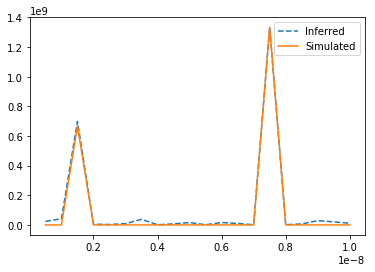

In [27]:
plt.plot(d, infer, '--', label='Inferred')
plt.plot(d, f, label='Simulated')
plt.legend()

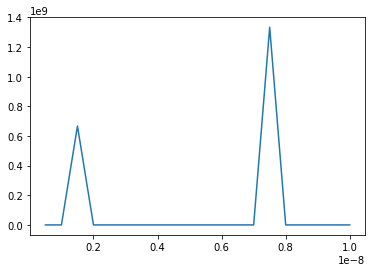

In [23]:
plt.plot(d, f)

In [24]:
beta_post = dls.get_beta(chained_sampler, ndim)
betaq = beta_post.quantile([0.5], axis=0)
betaq

,beta
0.5,1.173937


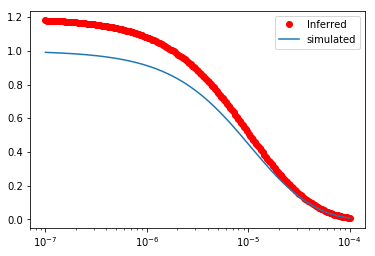

In [25]:
theta_infer = np.append(infer, 1.173937)
inferg2 = dls.g2(theta_infer, d, m, gamma, time)

plt.semilogx(time, inferg2, 'ro', label='Inferred')
plt.semilogx(time, sim_data, label='simulated')
plt.legend()

(array([ 438.,  637.,  896., 1431., 1898., 2593., 2725., 2078., 1259.,
        1045.]),
 array([9.81853401e-04, 2.00847260e-01, 4.00712666e-01, 6.00578072e-01,
        8.00443478e-01, 1.00030888e+00, 1.20017429e+00, 1.40003970e+00,
        1.59990510e+00, 1.79977051e+00, 1.99963591e+00]),
 <a list of 10 Patch objects>)

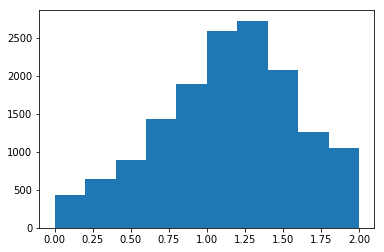

In [26]:
beta_posterior = beta_post.values.flatten()
plt.hist(beta_posterior)